# Libraries

In [1]:
import time
import math
import os
from collections import Counter
import datetime
#
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

# Data Analysis
import numpy as np
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from IPython.display import Image

# Visualation
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import plotly.offline as py
import plotly.graph_objs as go

# Machine learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

 # KNN
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

# Supervised Learning
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression ,LogisticRegressionCV

# Naive
from sklearn.naive_bayes import GaussianNB

#decision_tree

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
print ("imported ok")

imported ok


# Crawllers and Scraping Funcs

In [2]:
#get temperature table from noaa website
my_url = 'https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/all/12/1880-2022'
option = Options()
option.headless = False
#driver = webdriver.Chrome(options=option)
driver = webdriver.Chrome('/Users/saarazulay/Desktop/DSProject-main/chromedriver')
driver.get(my_url)
driver.maximize_window()
action = webdriver.ActionChains(driver)
search_bar = WebDriverWait(driver,
                            20).until(EC.presence_of_element_located((By.ID, 'valuesTable')))

html=driver.page_source
soup=BeautifulSoup(html,'html.parser')
div=soup.select_one("div#dataTable")
table=pd.read_html(str(div))
for i, tables in enumerate(table):
     tables.to_csv('noaaTemperature.csv')
print(table[0])

        Year Anomaly(1901-2000 Base Period)  Rank
0     202205                         0.77°C  1613
1     202204                         0.85°C  1647
2     202203                         0.94°C  1690
3     202202                         0.80°C  1626
4     202201                         0.88°C  1658
...      ...                            ...   ...
1704  188005                        -0.09°C   647
1705  188004                        -0.05°C   750
1706  188003                        -0.09°C   647
1707  188002                        -0.14°C   542
1708  188001                        -0.06°C   730

[1709 rows x 3 columns]


In [3]:
#get jsons from global-warming.org
#url = 'https://global-warming.org'
#tableUrl ='https://www.ncdc.noaa.gov/cag/'
HEADERS = {'user-agent': ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5)'
                           'AppleWebKit/537.36 (KHTML, like Gecko)'
                           'Chrome/45.0.2454.101 Safari/537.36'),
                           'referer': 'https://global-warming.org/'}

#soup = requests.get(url)
#temp =BeautifulSoup(soup.content, 'html.parser')
#hrefs = temp.find_all("div", class_="content api-content")
hrefs = ['https://global-warming.org/api/temperature-api','https://global-warming.org/api/co2-api',
         'https://global-warming.org/api/methane-api','https://global-warming.org/api/nitrous-oxide-api'
        ,'https://global-warming.org/api/arctic-api']
for href in hrefs:
    #print(href.b.contents[0].strip())
    response = requests.get(href,headers=HEADERS)
    jsonurl = response.json()
    df = pd.json_normalize(jsonurl[list(response.json().keys())[-1]])
    df.to_csv(href.split("/")[-1].split("-")[0]+".csv",index=False)
    print(href.split("/")[-1].split("-")[0]+".csv")

temperature.csv
co2.csv
methane.csv
nitrous.csv
arctic.csv


In [4]:
temp = pd.read_csv(r'noaaTemperature.csv')
co2 = pd.read_csv(r'co2.csv')
methane = pd.read_csv(r'methane.csv')
nitrous = pd.read_csv(r'nitrous.csv')
arctic = pd.read_csv(r'arctic.csv')

In [5]:
temp


Unnamed: 0    Year Anomaly(1901-2000 Base Period)  Rank
0              0  202205                         0.77°C  1613
1              1  202204                         0.85°C  1647
2              2  202203                         0.94°C  1690
3              3  202202                         0.80°C  1626
4              4  202201                         0.88°C  1658
...          ...     ...                            ...   ...
1704        1704  188005                        -0.09°C   647
1705        1705  188004                        -0.05°C   750
1706        1706  188003                        -0.09°C   647
1707        1707  188002                        -0.14°C   542
1708        1708  188001                        -0.06°C   730

[1709 rows x 4 columns]

In [6]:
co2

year  month  day   cycle   trend
0     2012      1    1  392.94  391.51
1     2012      1    2  392.97  391.51
2     2012      1    3  393.00  391.52
3     2012      1    4  393.03  391.52
4     2012      1    5  393.06  391.53
...    ...    ...  ...     ...     ...
3821  2022      6   18  418.19  417.40
3822  2022      6   19  418.12  417.41
3823  2022      6   20  418.06  417.41
3824  2022      6   21  417.99  417.42
3825  2022      6   22  417.92  417.43

[3826 rows x 5 columns]

In [7]:
methane

date  average   trend  averageUnc  trendUnc
0    1983.70   1625.9  1635.4         2.3       1.5
1    1983.80   1628.1  1635.9         2.9       1.4
2    1983.90   1638.4  1636.4         2.3       1.3
3    1983.10   1644.8  1636.9         1.4       1.2
4    1983.11   1642.6  1637.5         0.8       1.2
..       ...      ...     ...         ...       ...
459  2021.10   1908.2  1901.9        -9.9      -9.9
460  2021.11   1910.2  1903.3        -9.9      -9.9
461  2021.12   1910.5  1904.6        -9.9      -9.9
462  2022.10   1909.1  1905.8        -9.9      -9.9
463  2022.20   1908.5  1906.8        -9.9      -9.9

[464 rows x 5 columns]

In [8]:
nitrous

date  average  trend  averageUnc  trendUnc
0    2001.10    316.3  316.0         0.2       0.1
1    2001.20    316.3  316.1         0.2       0.1
2    2001.30    316.2  316.2         0.2       0.1
3    2001.40    316.1  316.2         0.1       0.1
4    2001.50    316.1  316.3         0.1       0.1
..       ...      ...    ...         ...       ...
249  2021.10    334.6  334.7        -9.9      -9.9
250  2021.11    334.9  334.8        -9.9      -9.9
251  2021.12    335.1  334.9        -9.9      -9.9
252  2022.10    335.3  335.0        -9.9      -9.9
253  2022.20    335.3  335.1        -9.9      -9.9

[254 rows x 5 columns]

In [9]:
arctic

Column1  year  month data-type hemisphere  extent  area  rank
0         0  1979      9   Goddard          N    7.05  4.58  33.0
1         1  1980      9   Goddard          N    7.67  4.87  43.0
2         2  1981      9   Goddard          N    7.14  4.44  34.5
3         3  1982      9   Goddard          N    7.30  4.43  37.0
4         4  1983      9   Goddard          N    7.39  4.70  39.0
5         5  1984      9   Goddard          N    6.81  4.11  31.0
6         6  1985      9   Goddard          N    6.70  4.23  29.0
7         7  1986      9   Goddard          N    7.41  4.72  40.0
8         8  1987      9   Goddard          N    7.28  5.64  36.0
9         9  1988      9   Goddard          N    7.37  5.36  38.0
10       10  1989      9   Goddard          N    7.01  4.86  32.0
11       11  1990      9   Goddard          N    6.14  4.55  23.0
12       12  1991      9   Goddard          N    6.47  4.51  26.0
13       13  1992      9   Goddard          N    7.47  5.43  41.0
14       14  1993      9   Goddard          N    6.40  4.58  25.0
15       15  1994      9   Goddard          N    7.14  5.13  34.5
16       16  1995      9   Goddard          N    6.08  4.43  20.0
17       17  1996      9   Goddard          N    7.58  5.62  42.0
18       18  1997      9   Goddard          N    6.69  4.89  28.0
19       19  1998      9   Goddard          N    6.54  4.30  27.0
20       20  1999      9   Goddard          N    6.12  4.29  21.5
21       21  2000      9   Goddard          N    6.25  4.35  24.0
22       22  2001      9   Goddard          N    6.73  4.59  30.0
23       23  2002      9   Goddard          N    5.83  4.03  17.0
24       24  2003      9   Goddard          N    6.12  4.05  21.5
25       25  2004      9   Goddard          N    5.98  4.39  19.0
26       26  2005      9   Goddard          N    5.50  4.07  16.0
27       27  2006      9   Goddard          N    5.86  4.01  18.0
28       28  2007      9   Goddard          N    4.27  2.82   3.0
29       29  2008      9   Goddard          N    4.69  3.26   8.0
30       30  2009      9   Goddard          N    5.26  3.76  15.0
31       31  2010      9   Goddard          N    4.87  3.34  11.0
32       32  2011      9   Goddard          N    4.56  3.21   6.0
33       33  2012      9   Goddard          N    3.57  2.41   1.0
34       34  2013      9   Goddard          N    5.21  3.78  13.0
35       35  2014      9   Goddard          N    5.22  3.74  14.0
36       36  2015      9   Goddard          N    4.62  3.42   7.0
37       37  2016      9   Goddard          N    4.53  2.91   5.0
38       38  2017      9   Goddard          N    4.82  3.35  10.0
39       39  2018      9   Goddard          N    4.79  3.35   9.0
40       40  2019      9   Goddard          N    4.36  3.17   4.0
41       41  2020      9   Goddard          N    4.00  2.83   2.0
42       42  2021      9   NRTSI-G          N    4.92  3.43  12.0

# Clean the data & Preper the data

In [10]:
#delete °C char from teperature column for us to work with float for the calc
temp['Anomaly(1901-2000 Base Period)'] = temp['Anomaly(1901-2000 Base Period)'].str.replace(r'°C$', '')

#calc mean of month from co2 df
group_data = co2.groupby(['year','month']).sum()
co2['co2']=co2.groupby(['year','month']).cycle.transform('mean')
co2.drop_duplicates(subset=['co2'],inplace=True,ignore_index=True)
co2.sort_values(by=['year', 'month'])
co2 = co2.drop(columns=['day','cycle','trend'])
data =pd.DataFrame()

#202205 - year -2022 , month - 05
temp['year'] = (temp['Year']/100).astype(int)
temp['month'] = (temp['Year']%100).astype(int)
#change col name
temp['temperature'] = (temp['Anomaly(1901-2000 Base Period)']).astype(float)
temp = temp.drop(columns=['Year','Rank','Anomaly(1901-2000 Base Period)'])


#methane data cleanind
methane = pd.read_csv(r'methane.csv')
methane['year'] = methane['date'].astype(int)
methane['month'] = np.where((np.modf(methane['date'])[0]>0.10)&(np.modf(methane['date'])[0]<0.13),(methane['date']*100%100).astype(int),(methane['date']*10%10).astype(int))
methane['month'] = methane['month'].replace(1,np.nan)
methane['ch4'] = methane['average']
methane = methane.drop(columns=['date','trend','averageUnc','trendUnc','average'])

#nitrous cleaning data
nitrous = pd.read_csv(r'nitrous.csv')
nitrous['year'] = nitrous['date'].astype(int)
nitrous['month'] = np.where((np.modf(nitrous['date'])[0]>0.10)&(np.modf(nitrous['date'])[0]<0.13),(nitrous['date']*100%100).astype(int),(nitrous['date']*10%10).astype(int))
nitrous['month'] = nitrous['month'].replace(1,np.nan)
nitrous['n2o'] = nitrous['average']
nitrous = nitrous.drop(columns=['date','trend','averageUnc','trendUnc','average'])

#merge dfs
data = pd.merge(temp,co2,on=['year','month'],how="left")
data = pd.merge(data,methane,on=['year','month'],how="left")
data = pd.merge(data,nitrous,on=['year','month'],how="left")
data = data[['year','month','temperature','co2','ch4','n2o']]
data

year  month  temperature         co2     ch4    n2o
0     2022      5         0.77  418.989677     NaN    NaN
1     2022      4         0.85  418.584333     NaN    NaN
2     2022      3         0.94  418.392903     NaN    NaN
3     2022      2         0.80  418.554643  1908.5  335.3
4     2022      1         0.88  418.384194     NaN    NaN
...    ...    ...          ...         ...     ...    ...
1704  1880      5        -0.09         NaN     NaN    NaN
1705  1880      4        -0.05         NaN     NaN    NaN
1706  1880      3        -0.09         NaN     NaN    NaN
1707  1880      2        -0.14         NaN     NaN    NaN
1708  1880      1        -0.06         NaN     NaN    NaN

[1709 rows x 6 columns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709 entries, 0 to 1708
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         1709 non-null   int64  
 1   month        1709 non-null   int64  
 2   temperature  1709 non-null   float64
 3   co2          125 non-null    float64
 4   ch4          386 non-null    float64
 5   n2o          211 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 93.5 KB


### Not enough data, after clearing NAN and duplicates there will be even fewer lines, so we need more data, at climatelevels.org we have an annual history of 1000 years

# add more data

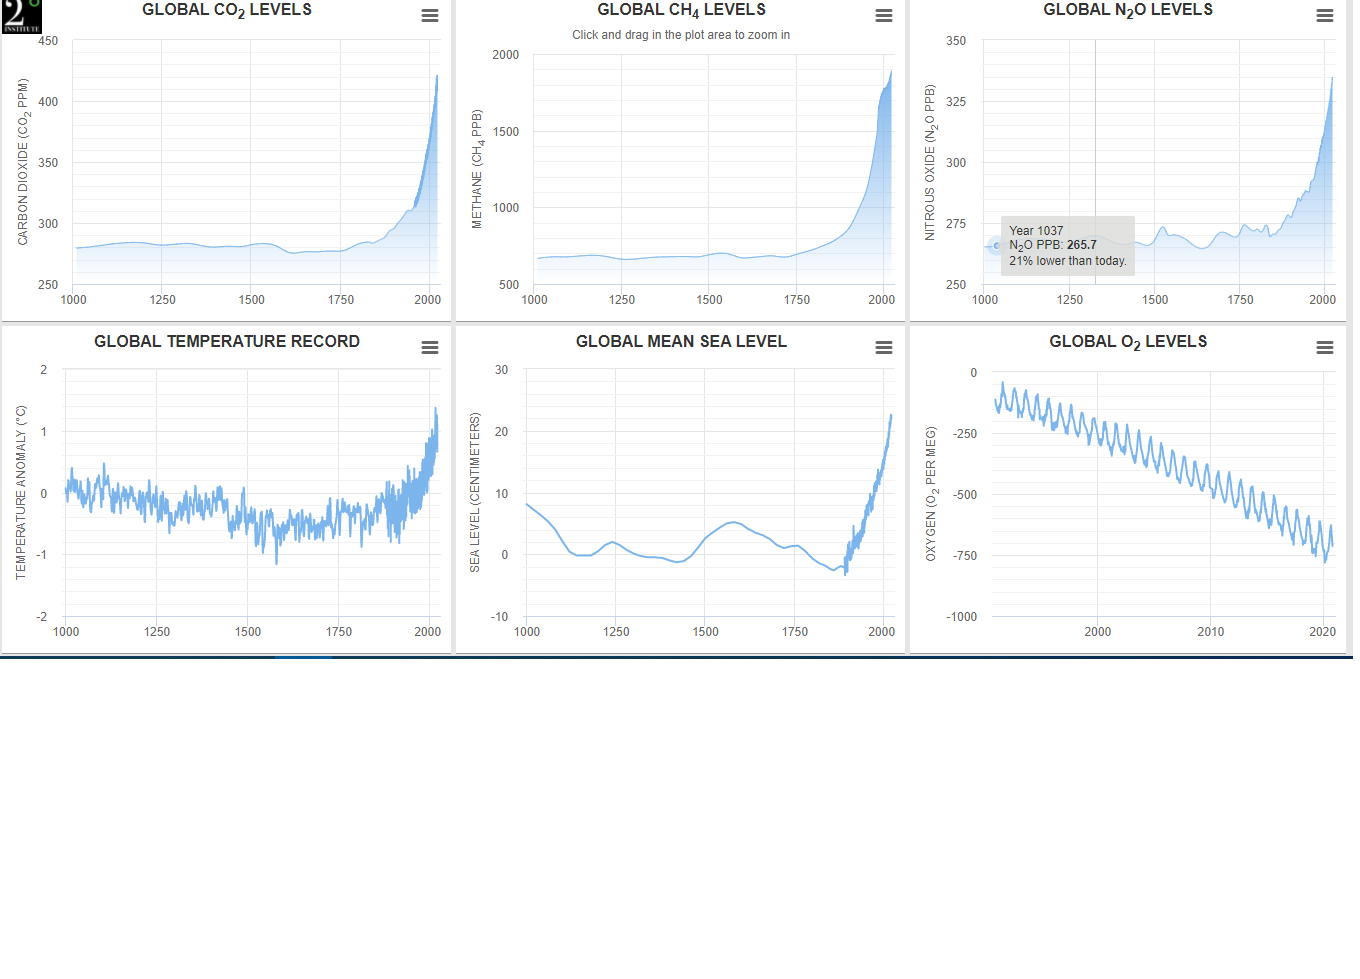

In [12]:
#https://www.climatelevels.org/?pid=2degreesinstitute&theme=grid-light
Image("image.png")

In [13]:
#links 
links = {'https://www.co2levels.org/':'globalCo2','https://www.oxygenlevels.org/':'globalO2',
         'https://www.n2olevels.org/':'globalN2o',
         'https://www.temperaturerecord.org/':'globalTemperatura',
         'https://www.methanelevels.org/':'globalMethane','https://www.sealevels.org/':'globalSealevel'}

In [21]:
def get_data(links):
    print('ok')
    for key,value in links.items():
        print('ok')
        option = Options()
        option.headless = False
        #driver = webdriver.Chrome(options=option)
        driver = webdriver.Chrome('/Users/saarazulay/Desktop/DSProject-main/chromedriver')
        print('ok')
        driver.get(key)
        driver.maximize_window()
        action = webdriver.ActionChains(driver)
        chart_search = WebDriverWait(driver,
                                   20).until(EC.presence_of_element_located((By.CLASS_NAME, 'highcharts-series-group')))
        search_button = driver.find_elements_by_css_selector('[onclick^=\"purecookieDismiss();\"]')[0]
        search_button.click()
        chart = driver.find_elements_by_css_selector('[fill^=\"none\"]')[0]
        action.move_to_element_with_offset(chart_search, chart_search.size['width'],0).perform()
        df = pd.DataFrame(columns=["year",value])
        pace=0
        while True:
            action.move_to_element_with_offset(chart_search, chart_search.size['width']+pace,0).perform()
            chart_text = driver.find_elements_by_css_selector('[style^=\"font-family:\"]')[3].text
            if chart_text!="":
                data = chart_text.split("\n")
                df=df.append({"year":data[0],value:data[1].split(":")[1]},ignore_index=True)
                pace =pace -1
            elif chart_text=="":
                break
        driver.quit()
        df.to_csv(value+".csv")

In [22]:
#set monthly data df
years = range(2022,999,-1)
months = range(12,0,-1)
df = pd.DataFrame(columns=["year","month"])
for year in years:
    for month in months:
        df =df.append({"year":year,"month":month},ignore_index=True)
df.head(20)

year month
0   2022    12
1   2022    11
2   2022    10
3   2022     9
4   2022     8
5   2022     7
6   2022     6
7   2022     5
8   2022     4
9   2022     3
10  2022     2
11  2022     1
12  2021    12
13  2021    11
14  2021    10
15  2021     9
16  2021     8
17  2021     7
18  2021     6
19  2021     5

In [23]:
def cleanData(data,name,pdToConcat):
    df = pd.read_csv(data)
    df=df.drop_duplicates(subset=['year'])
    if name =='methane':
        name1 = 'ch4'
    else:
        name1 = name
    try:
        df[name] = df[name].str.replace(r'°C$', '')
    except:
        print("not avalble")
    df['year'] = df['year'].str.replace(r'Year', 'May 12, ')
    df['year'] = df['year'].str.replace(r'-', ' 12, ')
    df_clean = pd.DataFrame()
    for index, row in df.iterrows():
        try:
            datee = datetime.datetime.strptime(row["year"], "%b %d, %y")
            df_clean = df_clean.append({"year":datee.year,"month":datee.month,name1:row[name]},ignore_index=True)
        except:
            try:
                datee = datetime.datetime.strptime(row["year"], "%B %d, %Y")
                df_clean = df_clean.append({"year":datee.year,"month":datee.month,name1:row[name]},ignore_index=True)
            except:
                try:
                    datee = datetime.datetime.strptime(row["year"], "%B %Y")
                    df_clean = df_clean.append({"year":datee.year,"month":datee.month,name1:row[name]},ignore_index=True)
                except:
                    datee = datetime.datetime.strptime(row["year"], "%B, %d, %Y")
                    df_clean = df_clean.append({"year":datee.year,"month":datee.month,name1:row[name]},ignore_index=True)
    df_clean['year'] = df_clean['year'].astype(int)
    df_clean['month'] = df_clean['month'].astype(int)
    df_clean = df_clean[['year','month',name1]]
    concatdata = pd.concat([pdToConcat,df_clean],ignore_index =True,sort=False)
    return concatdata

In [24]:
Temp_data = cleanData("globalTemperatura.csv",'temperature',temp)
Co2_data = cleanData("globalCo2.csv",'co2',co2)
Methane_data =cleanData("globalMethane.csv",'methane',methane)
Nitrous_data = cleanData("globalN2o.csv","n2o",nitrous)

not avalble
not avalble
not avalble


In [25]:
merged_data = pd.merge(df,Temp_data,on=['year','month'],how="left")
merged_data = merged_data.merge(Co2_data,on=['year','month'],how="left")
merged_data = merged_data.merge(Methane_data,on=['year','month'],how="left")
merged_data = merged_data.merge(Nitrous_data,on=['year','month'],how="left")
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12482 entries, 0 to 12481
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         12482 non-null  object 
 1   month        12482 non-null  object 
 2   Unnamed: 0   1782 non-null   float64
 3   temperature  2796 non-null   object 
 4   co2          548 non-null    float64
 5   ch4          738 non-null    float64
 6   n2o          1348 non-null   float64
dtypes: float64(4), object(3)
memory usage: 780.1+ KB


In [26]:
#replace Nana with linear methods
merged_data = merged_data[['year','month','temperature','co2','ch4','n2o']]
merged_data['temperature'] =merged_data['temperature'].astype(float)

interpolate_data = merged_data.copy()
interpolate_data['temperature']=interpolate_data['temperature'].interpolate(method='linear',limit_direction='both')
interpolate_data['ch4'] =interpolate_data['ch4'].interpolate(method='pchip',limit_direction='both')
interpolate_data = interpolate_data.interpolate(method="spline", order=2)
interpolate_data= interpolate_data.iloc[7:]
interpolate_data = interpolate_data.drop_duplicates(subset=['year','month'],ignore_index=True)
interpolate_data = interpolate_data.dropna()
interpolate_data[['temperature','co2','ch4','n2o']] = interpolate_data[['temperature','co2','ch4','n2o']].round(2)
interpolate_data

year month  temperature     co2      ch4     n2o
3      2022     2         0.80  418.55  1908.50  335.30
4      2022     1         0.88  418.38  1909.97  334.78
5      2021    12         0.83  417.29  1910.50  335.10
6      2021    11         0.90  415.70  1910.20  334.90
7      2021    10         0.88  413.85  1907.80  334.61
...     ...   ...          ...     ...      ...     ...
12264  1000     5         0.04  277.95   662.00  265.30
12265  1000     4         0.05  277.95   661.97  265.31
12266  1000     3         0.06  277.94   661.94  265.31
12267  1000     2         0.06  277.94   661.91  265.31
12268  1000     1         0.07  277.93   661.88  265.30

[12266 rows x 6 columns]

In [27]:
interpolate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12266 entries, 3 to 12268
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         12266 non-null  object 
 1   month        12266 non-null  object 
 2   temperature  12266 non-null  float64
 3   co2          12266 non-null  float64
 4   ch4          12266 non-null  float64
 5   n2o          12266 non-null  float64
dtypes: float64(4), object(2)
memory usage: 670.8+ KB


In [28]:
interpolate_data = interpolate_data.drop_duplicates(ignore_index=True)

interpolate_data.describe()

temperature           co2           ch4           n2o
count  12266.000000  12266.000000  12266.000000  12266.000000
mean      -0.234841    287.450753    766.339366    272.271710
std        0.298117     20.423125    238.541897     11.043459
min       -1.160000    275.170000    660.000000    264.500000
25%       -0.450000    280.500000    676.042500    267.360000
50%       -0.250000    282.410000    680.435000    268.520000
75%       -0.060000    283.380000    704.737500    271.720000
max        1.310000    418.550000   1910.500000    335.300000

# Visualation

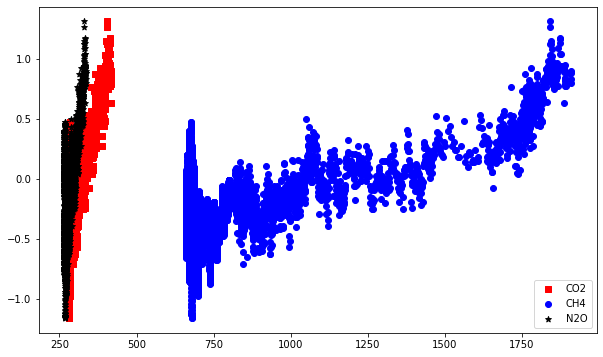

In [29]:
interpolate_data
plt.scatter(x=interpolate_data['co2'],y=interpolate_data['temperature'],c='r',marker='s',label='CO2')
plt.scatter(x=interpolate_data['ch4'],y=interpolate_data['temperature'],c='b',marker='o',label='CH4')
plt.scatter(x=interpolate_data['n2o'],y=interpolate_data['temperature'],c='k',marker='*',label='N2O')
plt.legend(numpoints=1,loc=4)
plt.show()

<AxesSubplot:>

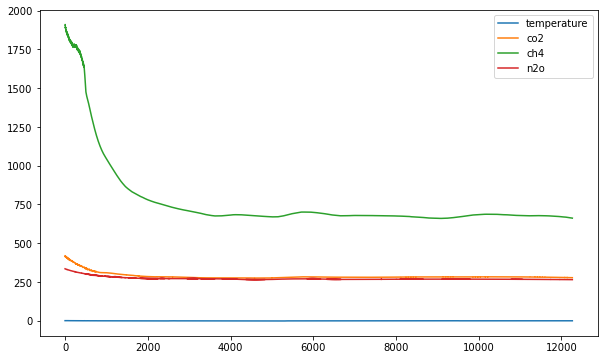

In [30]:
interpolate_data[['temperature','co2','ch4','n2o']].plot()

<AxesSubplot:xlabel='year', ylabel='temperature'>

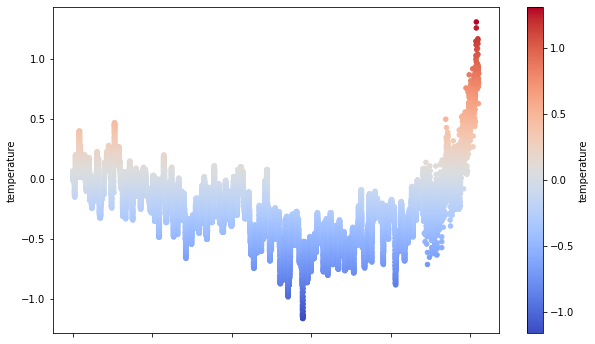

In [31]:
df_temp = interpolate_data[['year','temperature']]
df_temp.plot.scatter(x='year',y='temperature',c='temperature',cmap='coolwarm')

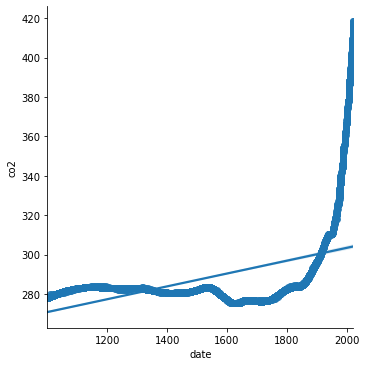

In [32]:
new_df = interpolate_data.copy()
new_df['date'] = new_df['year']+new_df['month']/100
new_df['date']=new_df['date'].astype(float)
sns.lmplot(x='date',y ='co2',data=new_df)

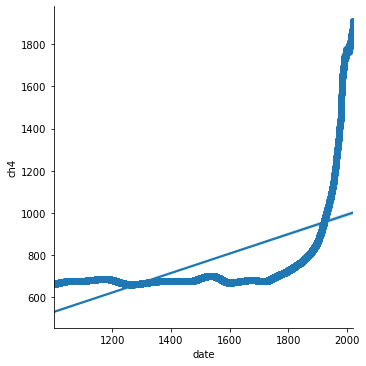

In [33]:
sns.lmplot(x='date',y ='ch4',data=new_df)

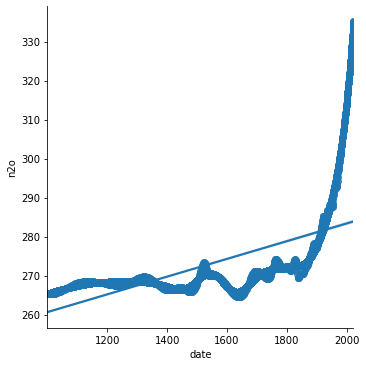

In [34]:
sns.lmplot(x='date',y ='n2o',data=new_df)

### We see the growth from 1800

<AxesSubplot:>

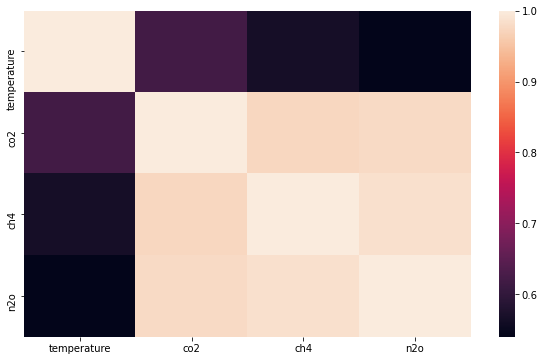

In [35]:
sns.heatmap(interpolate_data.corr())

# Machine Learning

In [36]:
ml_df = new_df[['date','temperature','co2','ch4','n2o']]
ml_df

date  temperature     co2      ch4     n2o
0      2022.02         0.80  418.55  1908.50  335.30
1      2022.01         0.88  418.38  1909.97  334.78
2      2021.12         0.83  417.29  1910.50  335.10
3      2021.11         0.90  415.70  1910.20  334.90
4      2021.10         0.88  413.85  1907.80  334.61
...        ...          ...     ...      ...     ...
12261  1000.05         0.04  277.95   662.00  265.30
12262  1000.04         0.05  277.95   661.97  265.31
12263  1000.03         0.06  277.94   661.94  265.31
12264  1000.02         0.06  277.94   661.91  265.31
12265  1000.01         0.07  277.93   661.88  265.30

[12266 rows x 5 columns]

In [37]:
# Lists

category = ['Intercept','R2','Mean Absolute Error','Mean Squared Error','Root Mean Squared']
machine= []
Intercept = []
R2 = []
Absolute_err = []
Squared_err = []
Mean_sq = []

In [38]:
def add_results(clf,name,X,y):
    Intercept.append(round(clf.score(X,y), 5))
    R2.append(round(metrics.r2_score(y,clf.predict(X)), 5))
    Absolute_err.append(round(metrics.mean_absolute_error(y,clf.predict(X)), 5))
    Squared_err.append(round(metrics.mean_squared_error(y,clf.predict(X)), 5))
    Mean_sq.append(round(np.sqrt(metrics.mean_squared_error(y,clf.predict(X))), 5))
    machine.append(name)
def print_resulrs(clf,X,y):
    print("R2:",clf.score(X,y))
    print("R2:",metrics.r2_score(y,clf.predict(X)))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y,clf.predict(X)))
    print('Mean Squared Error:', metrics.mean_squared_error(y,clf.predict(X)))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,clf.predict(X))))
    
    
def find_best_random_forest_num_estimators(X_train, y_train):
    parameters = {'n_estimators':[71,101,300,500] }
    rf = RandomForestRegressor()
    clf = GridSearchCV(rf, parameters,scoring=make_scorer(metrics.r2_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_num_estimators = clf.best_params_['n_estimators']
    return best_num_estimators


def Random_Forest(X_train, y_train):
    best_num_estimators = find_best_random_forest_num_estimators(X_train, y_train)
    params = {'num_estimator':best_num_estimators}
    clf = RandomForestRegressor(n_estimators=params['num_estimator'], random_state=0)
    print("Best num estimator is:",best_num_estimators,"\n")
    return clf
    
    
    
def plot_results(name,machine):
    x = np.arange(len(machine))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots(figsize=(20,10))
    rects1 = ax.bar(x +0.0, Intercept, width, label='Intercept',color='b')
    rects2 = ax.bar(x + 0.15, R2, width, label='R2',color='g')
    rects3 = ax.bar(x + 0.30, Absolute_err, width, label='Mean Absolute Error',color='r')
    rects4 = ax.bar(x + 0.45, Squared_err, width, label='Mean Squared Error',color='purple')
    rects5 = ax.bar(x + 0.60, Mean_sq, width, label='Root Mean Squared',color='lavender')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(name)
    ax.set_xticks(x)
    ax.set_xticklabels(machine)
    ax.legend()
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    autolabel(rects5)

# linear regression

             temperature       co2       ch4       n2o
temperature     1.000000  0.620171  0.565375  0.539797
co2             0.620171  1.000000  0.975902  0.979139
ch4             0.565375  0.975902  1.000000  0.986141
n2o             0.539797  0.979139  0.986141  1.000000


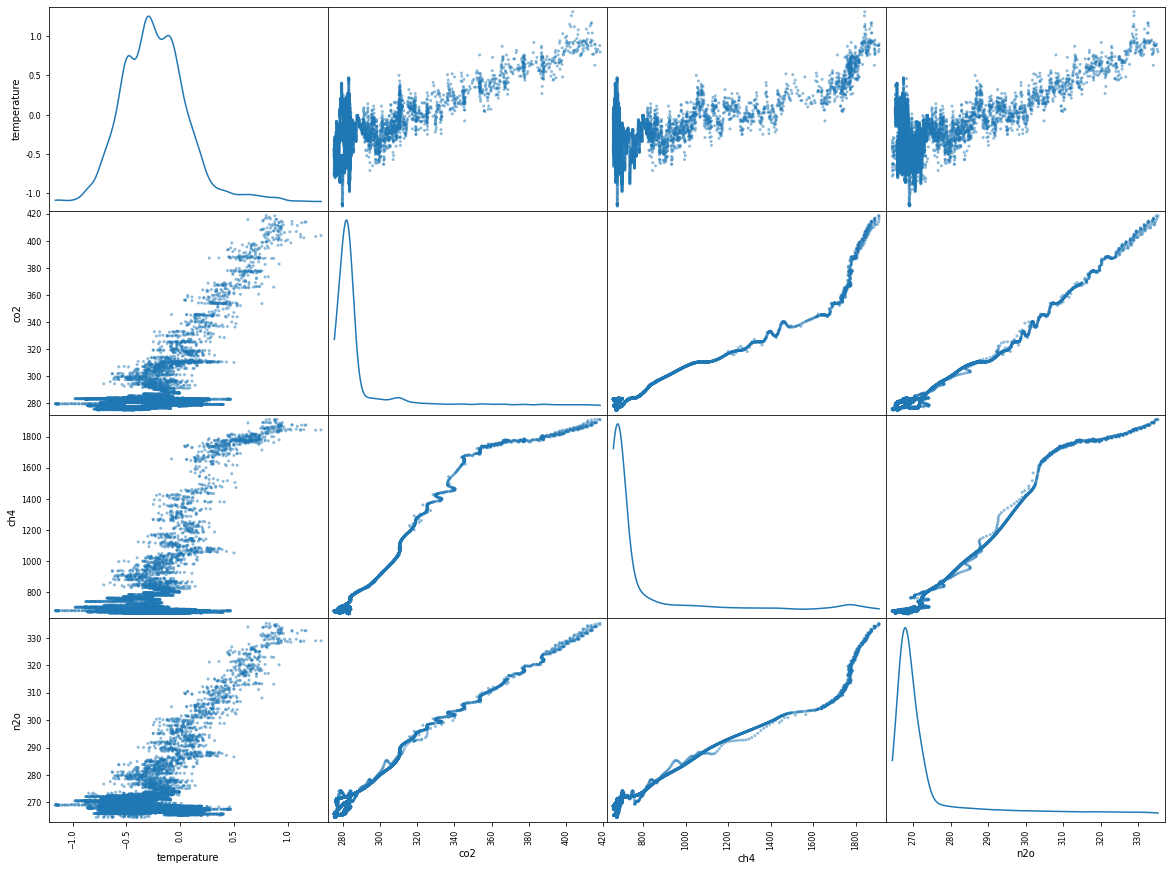

In [39]:

print(ml_df[['temperature','co2','ch4','n2o']].corr())
pd.plotting.scatter_matrix(ml_df[['temperature','co2','ch4','n2o']], figsize=(20, 15), diagonal='kde')
plt.show()

In [40]:
#Split to train and test
X = ml_df[['date','co2','ch4','n2o']].values.reshape(ml_df[['date','co2','ch4','n2o']].shape[0],4)
y = ml_df['temperature'].values.reshape(ml_df['temperature'].shape[0],1)
LR_clf = linear_model.LinearRegression().fit(X=X, y=y)
add_results(LR_clf,"all",X,y)
print("Slope:",LR_clf.coef_)
print("Intercept:",LR_clf.intercept_)
print_resulrs(LR_clf,X,y)

Slope: [[-0.00066524  0.00181705  0.00058695  0.00958558]]
Intercept: [-2.81189587]
R2: 0.6106611953546659
R2: 0.6106611953546659
Mean Absolute Error: 0.1475986155132819
Mean Squared Error: 0.03459926102910144
Root Mean Squared Error: 0.18600876600069535


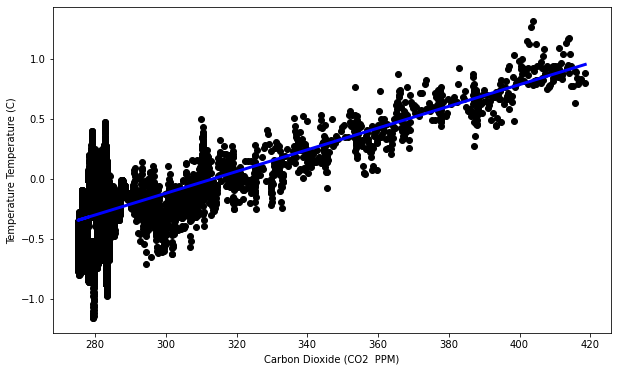

Slope: [[0.00905266]]
R2: 0.384611839846993
R2: 0.384611839846993
Mean Absolute Error: 0.18685236070309508
Mean Squared Error: 0.05468752493537904
Root Mean Squared Error: 0.2338536399874482


In [41]:
X = ml_df[['co2']].values.reshape(ml_df[['co2']].shape[0],1)
y =ml_df['temperature'].values.reshape(ml_df['temperature'].shape[0],1)
LR_clf.fit(X=X, y=y)
add_results(LR_clf,"co2",X,y)

plt.scatter(X, y,  color='black')
plt.plot(X, LR_clf.predict(X), color='blue', linewidth=3)

plt.xlabel('Carbon Dioxide (CO2  PPM)')
plt.ylabel('Temperature Temperature (C)')
plt.show()
print("Slope:",LR_clf.coef_)
print_resulrs(LR_clf,X,y)

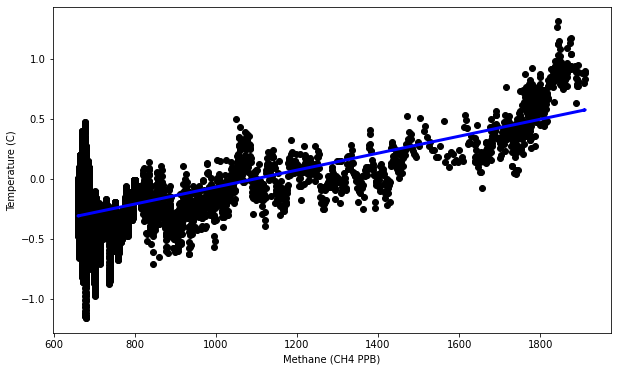

Slope: [[0.00070658]]
R2: 0.3196483322384137
R2: 0.3196483322384137
Mean Absolute Error: 0.19911871389423957
Mean Squared Error: 0.060460618524554595
Root Mean Squared Error: 0.24588741026037628


In [42]:
X = ml_df[['ch4']].values.reshape(ml_df[['ch4']].shape[0],1)
y =ml_df['temperature'].values.reshape(ml_df['temperature'].shape[0],1)
LR_clf.fit(X=X, y=y)
add_results(LR_clf,"ch4",X,y)
plt.scatter(X, y,  color='black')
plt.plot(X, LR_clf.predict(X), color='blue', linewidth=3)

plt.xlabel('Methane (CH4 PPB)')
plt.ylabel('Temperature (C)')
plt.show()
print("Slope:",LR_clf.coef_)
print_resulrs(LR_clf,X,y)

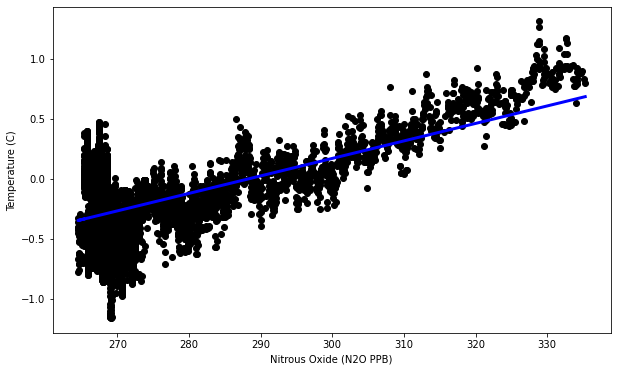

Slope: [[0.01457179]]
R2: 0.2913813052295736
R2: 0.2913813052295736
Mean Absolute Error: 0.20308529339255244
Mean Squared Error: 0.06297261638946415
Root Mean Squared Error: 0.2509434525734118


In [43]:
X = ml_df[['n2o']].values.reshape(ml_df[['n2o']].shape[0],1)
y =ml_df['temperature'].values.reshape(ml_df['temperature'].shape[0],1)
LR_clf.fit(X=X, y=y)
add_results(LR_clf,"n20",X,y)
plt.scatter(X, y,  color='black')
plt.plot(X, LR_clf.predict(X), color='blue', linewidth=3)

plt.xlabel('Nitrous Oxide (N2O PPB)')
plt.ylabel('Temperature (C)')
plt.show()
print("Slope:",LR_clf.coef_)
print_resulrs(LR_clf,X,y)

# results

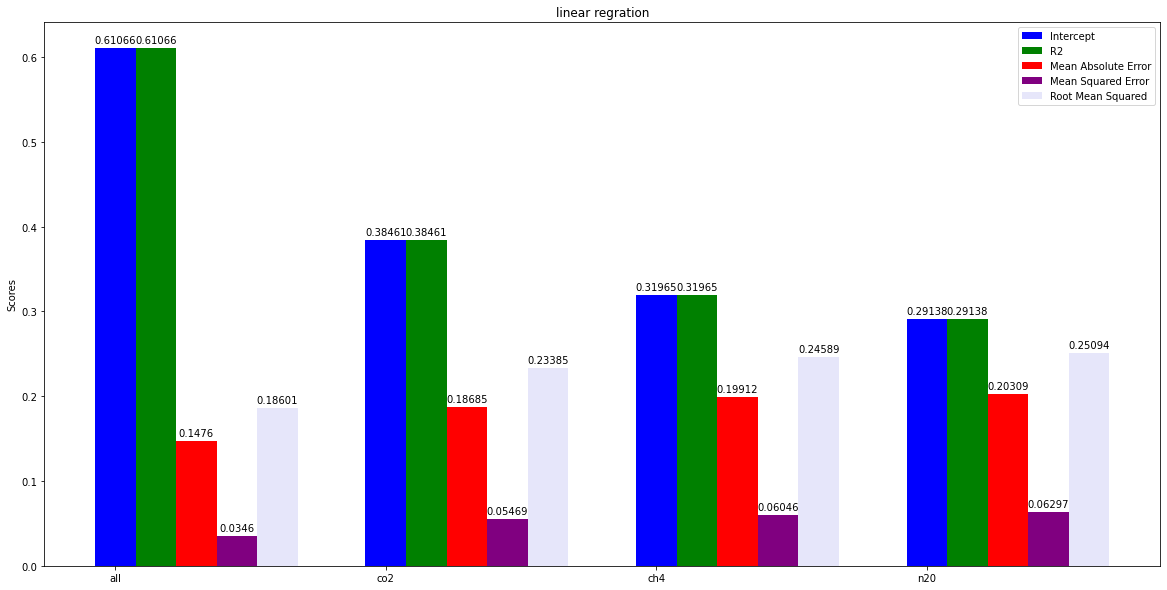

In [44]:
#plt.bar(machine,test)
plot_results('linear regration',machine)

# Random Fores

In [45]:
#lists
machine= []
Intercept = []
R2 = []
Absolute_err = []
Squared_err = []
Mean_sq = []
#add best resalt for linear test
X = ml_df[['date','co2','ch4','n2o']].values.reshape(ml_df[['date','co2','ch4','n2o']].shape[0],4)
y = ml_df['temperature'].values.reshape(ml_df['temperature'].shape[0],1)
LR_clf = linear_model.LinearRegression().fit(X=X, y=y)
add_results(LR_clf,"Linear Regration",X,y)

In [46]:
X = ml_df[['date','co2','ch4','n2o']]
y = ml_df[['temperature']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
regressor = Random_Forest(X_train, y_train)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

Best num estimator is: 500 



array([-0.3094 , -0.42734, -0.20556, ..., -0.03242, -0.41622,  0.02228])

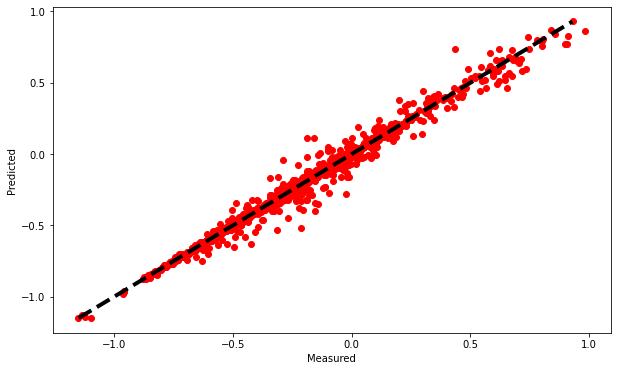

R2: 0.9979240990883853
R2: 0.9979240990883853
Mean Absolute Error: 0.0057303893192010395
Mean Squared Error: 0.00018630410986547095
Root Mean Squared Error: 0.013649326352075802


In [47]:
add_results(regressor,"Random Fores",X_train, y_train)
plt.scatter(y_pred, y_test,  color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()
print_resulrs(regressor,X_train, y_train)

# SVR

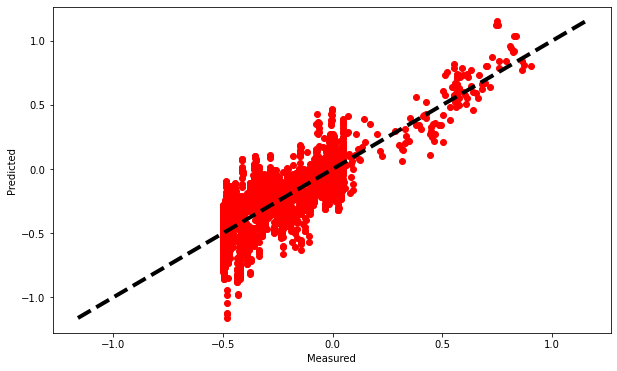

R2: 0.6909603890807823
R2: 0.6909603890807823
Mean Absolute Error: 0.13072649976248799
Mean Squared Error: 0.027188189480997976
Root Mean Squared Error: 0.16488841524193862


In [48]:
X = ml_df[['date','co2','ch4','n2o']]
y = ml_df[['temperature']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
svrregressor = SVR()
svrregressor.fit(X_train, y_train)
y_predict_svc = svrregressor.predict(X_test)

add_results(svrregressor,"SVR",X_train, y_train)

plt.scatter(y_predict_svc, y_test,  color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()
print_resulrs(svrregressor,X_train, y_train)

# display results for all tests

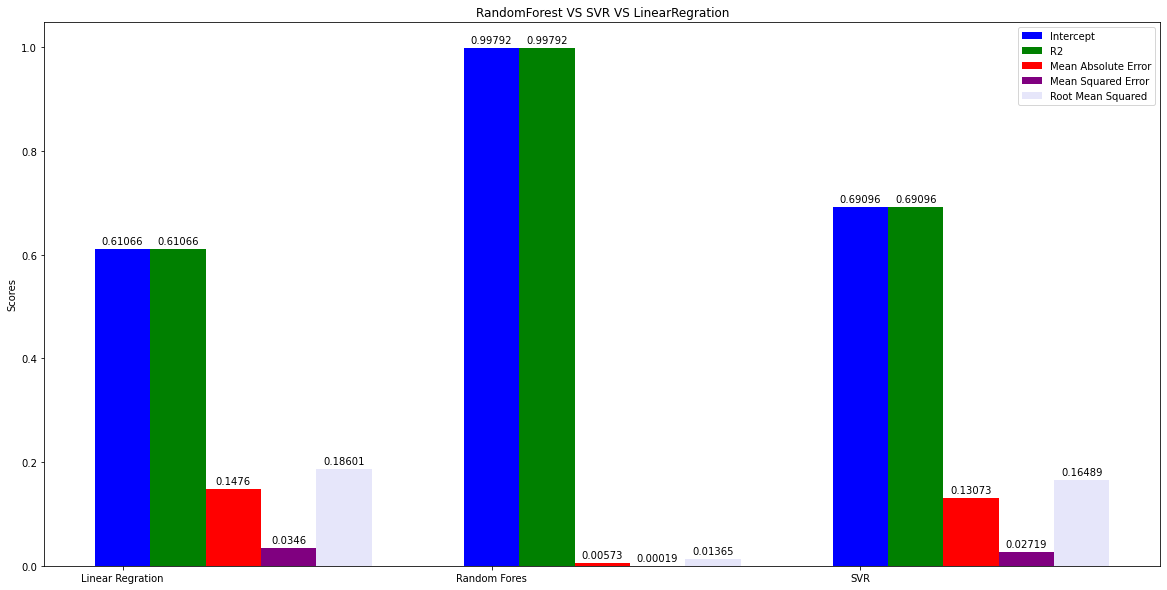

In [49]:
plot_results('RandomForest VS SVR VS LinearRegration',machine)

### Rando Forest has best results

# Lets predict temperature for next year

In [50]:
#shift data 12 month badata_to_predict =interpolate_data5.copy()
ml_df
data_to_predict=ml_df.shift(-12)
data_to_predict[['date','temperature']] = ml_df[['date','temperature']]
data_to_predict= data_to_predict.dropna()
#train
X_train, X_test, y_train, y_test = train_test_split(data_to_predict[['co2','ch4','n2o']],
                                                    data_to_predict[['temperature']]*100, test_size=0.2, random_state=0)
regressor = Random_Forest(X_train, y_train)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Best num estimator is: 500 



In [51]:
print("R2:",metrics.r2_score(y_test,regressor.predict(X_test)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,regressor.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,regressor.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,regressor.predict(X_test))))

R2: 0.9756382787738975
Mean Absolute Error: 1.9942023625403462
Mean Squared Error: 20.111093534489545
Root Mean Squared Error: 4.484539389334154


In [52]:
new_data_to_predict=ml_df.copy()
predicted_years = range(2022, 999,-1)
predicted_months = range(12, 0,-1)

predicted_x= pd.DataFrame()
for y in predicted_years:
    for j in predicted_months:
        predicted_x = predicted_x.append({'date':y+j/100},ignore_index=True)
predicted_x = predicted_x.loc[9:].reset_index(drop=True)
new_data_to_predict['date'] = predicted_x['date']
new_data_to_predict

date  temperature     co2      ch4     n2o
0      2022.03         0.80  418.55  1908.50  335.30
1      2022.02         0.88  418.38  1909.97  334.78
2      2022.01         0.83  417.29  1910.50  335.10
3      2021.12         0.90  415.70  1910.20  334.90
4      2021.11         0.88  413.85  1907.80  334.61
...        ...          ...     ...      ...     ...
12261  1000.06         0.04  277.95   662.00  265.30
12262  1000.05         0.05  277.95   661.97  265.31
12263  1000.04         0.06  277.94   661.94  265.31
12264  1000.03         0.06  277.94   661.91  265.31
12265  1000.02         0.07  277.93   661.88  265.30

[12266 rows x 5 columns]

In [53]:
# Predict future values
y_pred = regressor.predict(new_data_to_predict[['date','co2','ch4','n2o']])

ValueError: X has 4 features, but DecisionTreeRegressor is expecting 3 features as input.

In [ ]:
y1 = ml_df['temperature'].values
second_trace = go.Scatter(x=ml_df['date'], y=y1, mode="markers", name="Actual value")
# Predict values
fifth_trace = go.Scatter(x=new_data_to_predict['date'], y=y_pred/100, line=dict(color="red"), name="Predicted value")
period_default = 2013.01, 2023.12
ppm_range_def = (0, 1.5)
layout = go.Layout(
    title="Predicted Vs. Actual " +chr(176)+"C" ,
    yaxis=dict(title=chr(176)+"C", 
               range=ppm_range_def),xaxis=dict(title="Year", range=period_default))
figure = go.Figure(data=[second_trace, fifth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")

### temperature anomaly in march 2023 will be 0.79 C